In [55]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import animation, rc
import matplotlib
import random
rc('animation', html='jshtml')

In [56]:
def plotConfigurations(configurations):
    fig = plt.figure("Simulation 1D", figsize=(6,10))
    ax = fig.add_subplot(111)
    ax.imshow(np.asarray(configurations).transpose(), interpolation='none', aspect='auto', origin='lower')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"Time")
    ax.set_xlim(0, None)
    fig.suptitle("Simulation")
    plt.show()

In [57]:
def plot_metropolis_2D(data):
    cmap = cm.get_cmap('YlGnBu', 2)
    plt.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    plt.show()

In [58]:
def generate_ising_chain(dipoles):
    return np.asarray([random.choice([-1,1]) for _ in range(dipoles)])

In [59]:
def energy(conf, J = 1):
    return -J * np.sum(np.multiply(conf[:-1], conf[1:]))

In [60]:
def energy_alt(conf, J = 1):
    return -J * np.sum(conf * np.roll(conf,1))

In [84]:
def metropolis_1D(ising_chain, n, k_T, dipoles):
    config = [ising_chain]
    eold = energy_alt(config)
    for k in range(n):
        flipidx = random.randint(0, dipoles - 1)
        trial = config[k].copy()
        trial[flipidx] = trial[flipidx] * -1
        etrial = energy_alt(trial)
        if random.random() <= (np.exp((eold - etrial) / k_T)):
            config.append(trial)
            eold = etrial
        else:
            config.append(config[k])
    return config

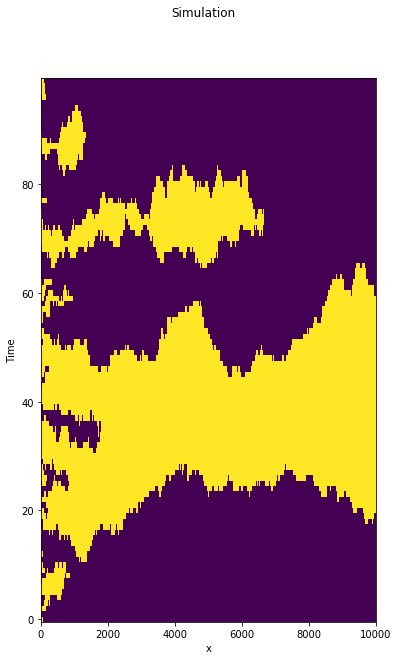

In [86]:
'''
If the consecutive dipoles are in opposite direction, they produce +J energy and and hence we expect 
more alternating diopoles for higher k_t values. For the same energy difference, at higher temperatures the value 
of (np.exp((eold - etrial) / k_T)) will be higher so we have a higher chance of picking a config at higher 
energies which means more chaotic chains are preferred.
'''

random.seed()
dipoles = 100
k_T = 0.1
steps = dipoles * 100

ising_chain = generate_ising_chain(dipoles)
config_history = metropolis_1D(ising_chain, steps, k_T, dipoles)

plotConfigurations(config_history)

In [91]:
def plotConfigurations2D(configurations, interval=20):
    '''
    Can be used to plot your generated configurations in an animation.
    @param configurations: List of configurations, where each configuration
                       is a matrix of the 2D spin alignments.
    @param interval: Time in ms each configuration is show during the animation.
    '''
    fig = plt.figure("Initial configuration", figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(configurations[0], interpolation='none', origin='lower')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    fig.suptitle("Initial configuration")
    plt.show()
    
    fig = plt.figure("Final configuration", figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(configurations[0], interpolation='none', origin='lower')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    fig.suptitle("Final configuration")
    plt.show()
    
    if len(configurations) > 1:
        figAni = plt.figure("Simulation", figsize=(6,6))
        axAni = figAni.add_subplot(111)
        im = axAni.imshow(configurations[0], interpolation='none', animated=True, origin='lower')
        axAni.set_xlabel(r"x")
        axAni.set_ylabel(r"y")
        figAni.suptitle("Simulation")

        def updatefig(i):
            print(i,end='\r')
            im.set_array(configurations[i])
            return im,

        ani = animation.FuncAnimation(figAni, updatefig, np.arange(1,len(configurations)), interval=interval, repeat=False)

    return ani

In [92]:
def generate_ising_chain_2D(dipoles):
    return np.asarray([[random.choice([-1,1]) for _ in range(dipoles)] for _ in range(dipoles)])

In [93]:
def energy2D(config, J = 1):
    configx = np.roll(config, 1, 0)
    configy = np.roll(config, 1, 1)
    return -J * np.sum(config * configx + config * configy)

In [94]:
def metropolis_2D(ising_chain, n, k_T, dipoles):
    config = [ising_chain]
    eold = energy2D(config)
    for k in range(n):
        flipi = random.randint(0, dipoles - 1)
        flipj = random.randint(0, dipoles - 1)
        trial = config[k].copy()
        trial[flipi, flipj] = trial[flipi, flipj] * -1
        etrial = energy_alt(trial)
        if random.random() <= (np.exp((eold - etrial) / k_T)):
            config.append(trial)
            eold = etrial
        else:
            config.append(config[k])
    return config

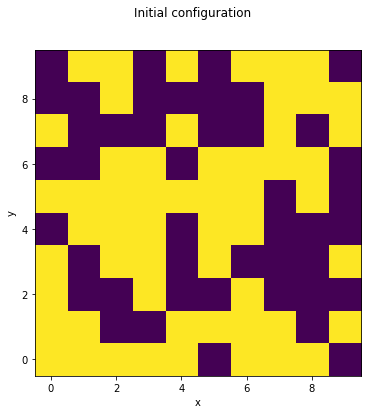

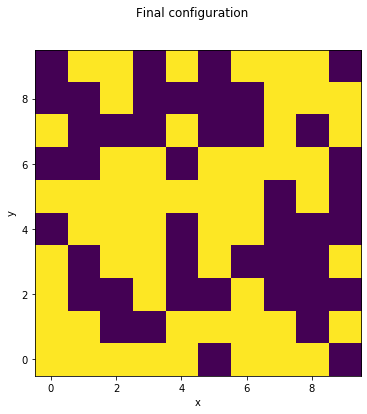

In [ ]:
random.seed()
dipoles = 10
steps = 100* dipoles**2
k_T = 0.1

ising_chain = generate_ising_chain_2D(dipoles)

ising_chain = generate_ising_chain_2D(dipoles)
config_history = metropolis_2D(ising_chain, steps, k_T, dipoles)

plotConfigurations2D(config_history)

# configurations = []

# J = 1
    
# eold = energy2D(S)

# for n in range(Nsteps):
#     trial = S.copy()
#     flipi = random.randint(0, Nspins - 1)
#     flipj = random.randint(0, Nspins - 1)
#     trial[flipi, flipj] = trial[flipi, flipj] * -1
#     etrial = energy2D(trial)
#     p = np.exp(-(etrial - eold) / kt)
#     if random.random() <= p:
#         S = trial
#         eold = etrial
#     if n % Nspins == 0:
#         configurations.append(S)

# plotConfigurations2D(configurations)